In [28]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

## Testing if YHe_twin = 0 turns off He related recombination

In [89]:
thermo_He = np.loadtxt('./output/TwinOut_r0.200_v2.00_N0.10thermodynamics.dat')
thermo_noHe = np.loadtxt('./output/TwinOut_r0.300_v2.00_N0.10thermodynamics.dat')
#thermo_noHe = np.loadtxt('./output/adm_r0.100_me9.1e-31_mp1.7e-26_alpha0.007thermodynamics.dat')

<IPython.core.display.Javascript object>


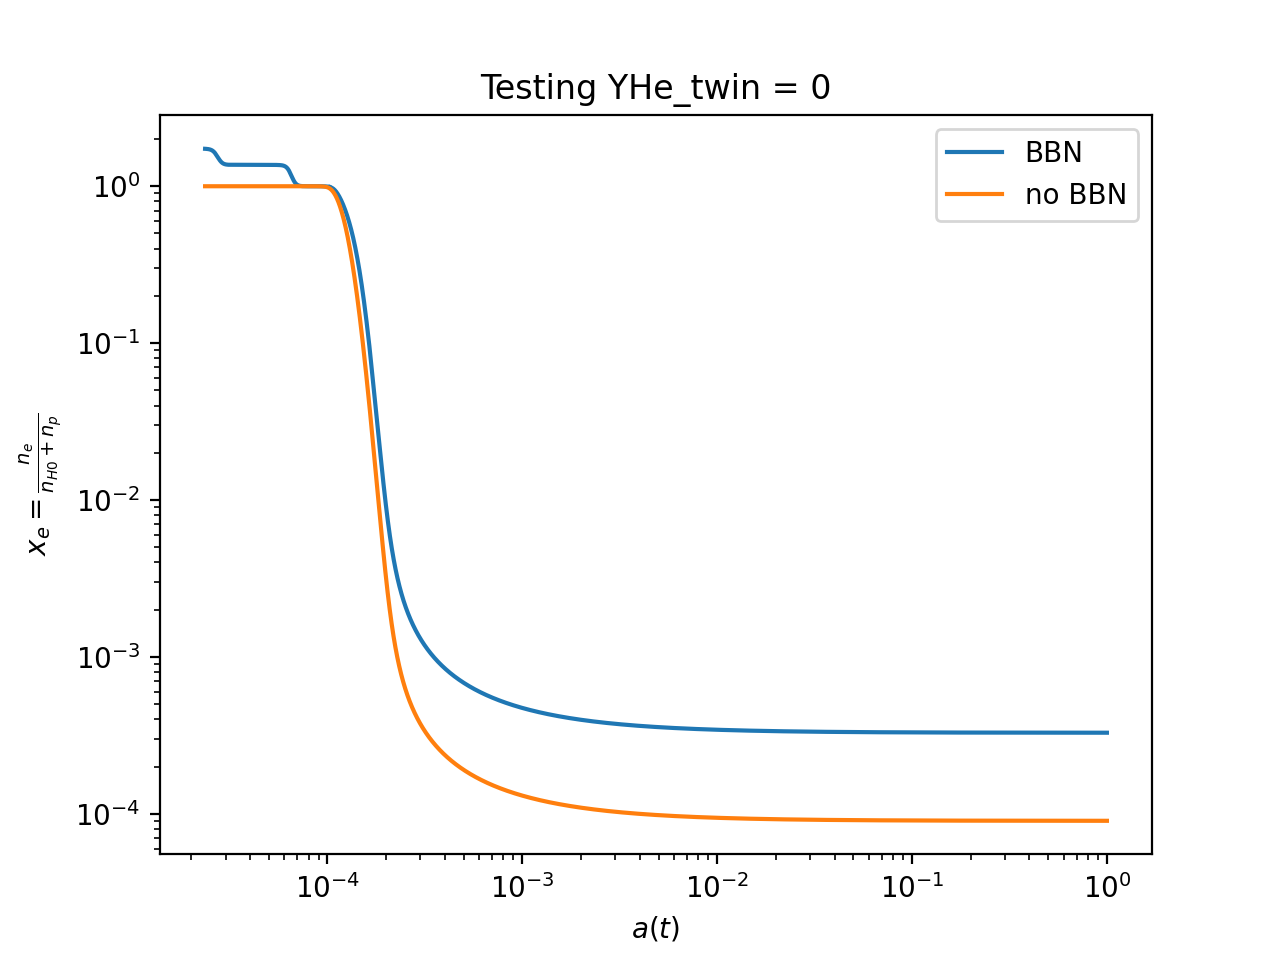

In [90]:
plt.figure()

plt.plot(1./(1.+thermo_He[:,0]),thermo_He[:,10],label='BBN')
plt.plot(1./(1.+thermo_noHe[:,0]),thermo_noHe[:,10],label='no BBN')
plt.ylabel('')
plt.yscale('log')
plt.xscale('log')
plt.title('Testing YHe_twin = 0')
plt.ylabel(r'$x_e = \frac{n_e}{n_{H0} + n_p}$')
plt.xlabel(r'$a(t)$')
plt.legend()

From the plot above, it seems (nominally) like He recombination is turned off with YHe_twin = 0 since the initial ionization fraction is 1.0 for the no-BBN line but > 1.0 for the BBN line. Output from the run also confirms that no He recombination occurs at early times (the related print statement does not occur). 

## Testing to see if $c_{twin}^2 = c_{idm}^2$

In [37]:
twin_std = np.loadtxt('./output/adm_r0.100_me9.109e-31_mp1.673e-27_alpha0.007thermodynamics.dat')
twin_10mp = np.loadtxt('./output/adm_r0.100_me9.1e-31_mp1.7e-26_alpha0.007thermodynamics.dat')

<IPython.core.display.Javascript object>


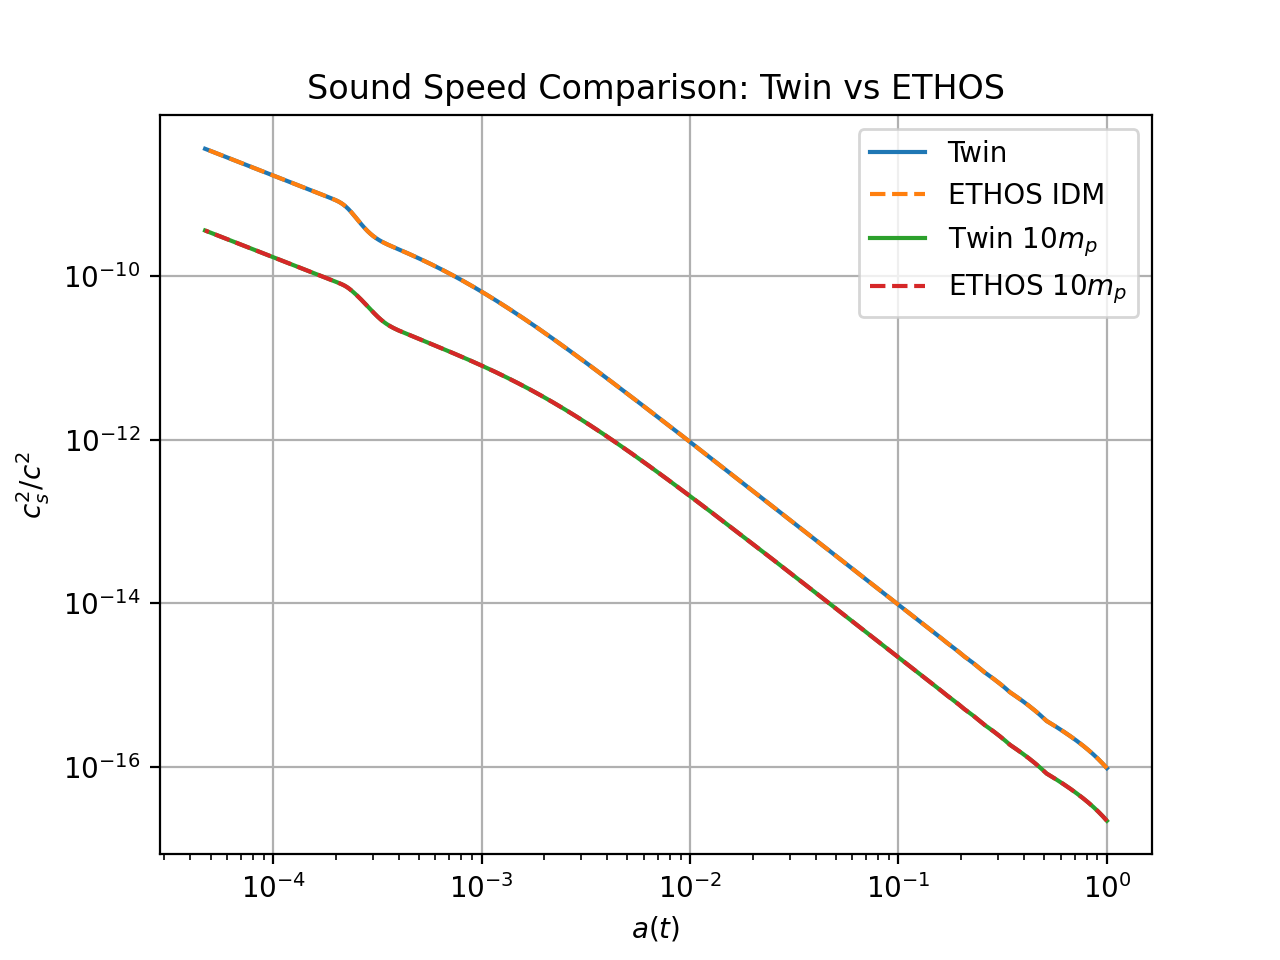

In [42]:
plt.figure()

plt.plot(1./(1.+twin_std[:,0]),twin_std[:,14],label="Twin")
plt.plot(1./(1.+twin_std[:,0]),twin_std[:,22],'--',label="ETHOS IDM")
plt.plot(1./(1.+twin_10mp[:,0]),twin_10mp[:,14],label=r"Twin 10$m_p$")
plt.plot(1./(1.+twin_10mp[:,0]),twin_10mp[:,22],'--',label=r"ETHOS 10$m_p$")

plt.title(r"Sound Speed Comparison: Twin vs ETHOS")
plt.ylabel(r"$c_s^2/c^2$")
plt.xlabel(r'$a(t)$')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.grid(True)

From basic thermodynamic calculations, one can derive that $$c_s^2 \propto \frac{T}{m}$$ This is demonstrated in the plot above where multiplying the twin proton mass by 10 also decreases the sound speed by approx. an order of magnitude, as naively expected. The fact that the ETHOS and Twin sound speeds match is great. 

## Testing to see if $\hat{\alpha}$ is affecting the physics correctly

In [61]:
twin_std = np.loadtxt('./output/adm_r0.100_me9.1e-31_mp1.7e-27_alpha0.007thermodynamics.dat')
twin_a010 = np.loadtxt('./output/adm_r0.100_me9.1e-31_mp1.7e-27_alpha0.010thermodynamics.dat')
twin_a050 = np.loadtxt('./output/adm_r0.100_me9.1e-31_mp1.7e-27_alpha0.050thermodynamics.dat')
twin_a005 = np.loadtxt('./output/adm_r0.100_me9.1e-31_mp1.7e-27_alpha0.005thermodynamics.dat')

<IPython.core.display.Javascript object>


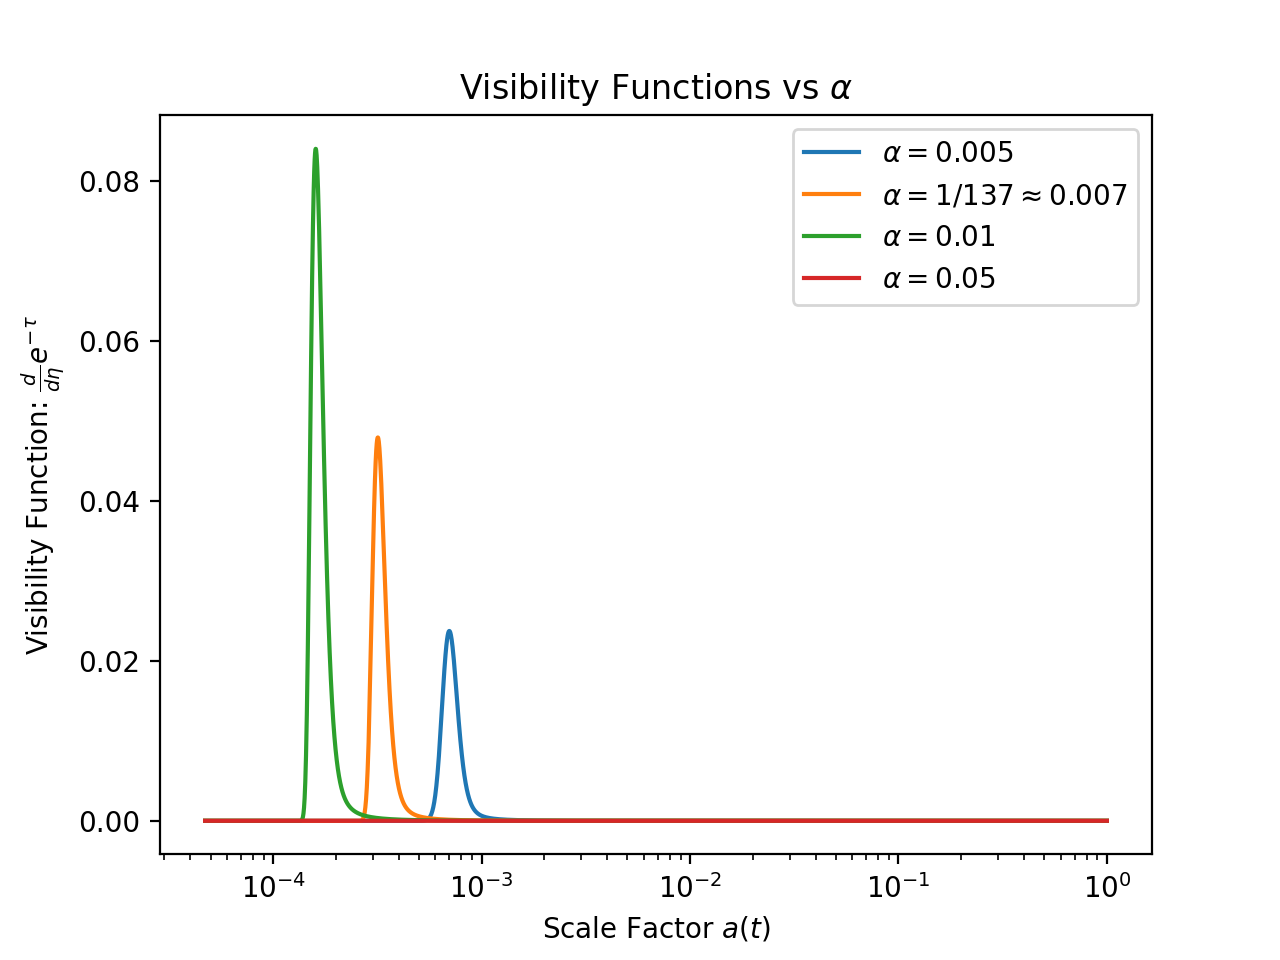

<IPython.core.display.Javascript object>


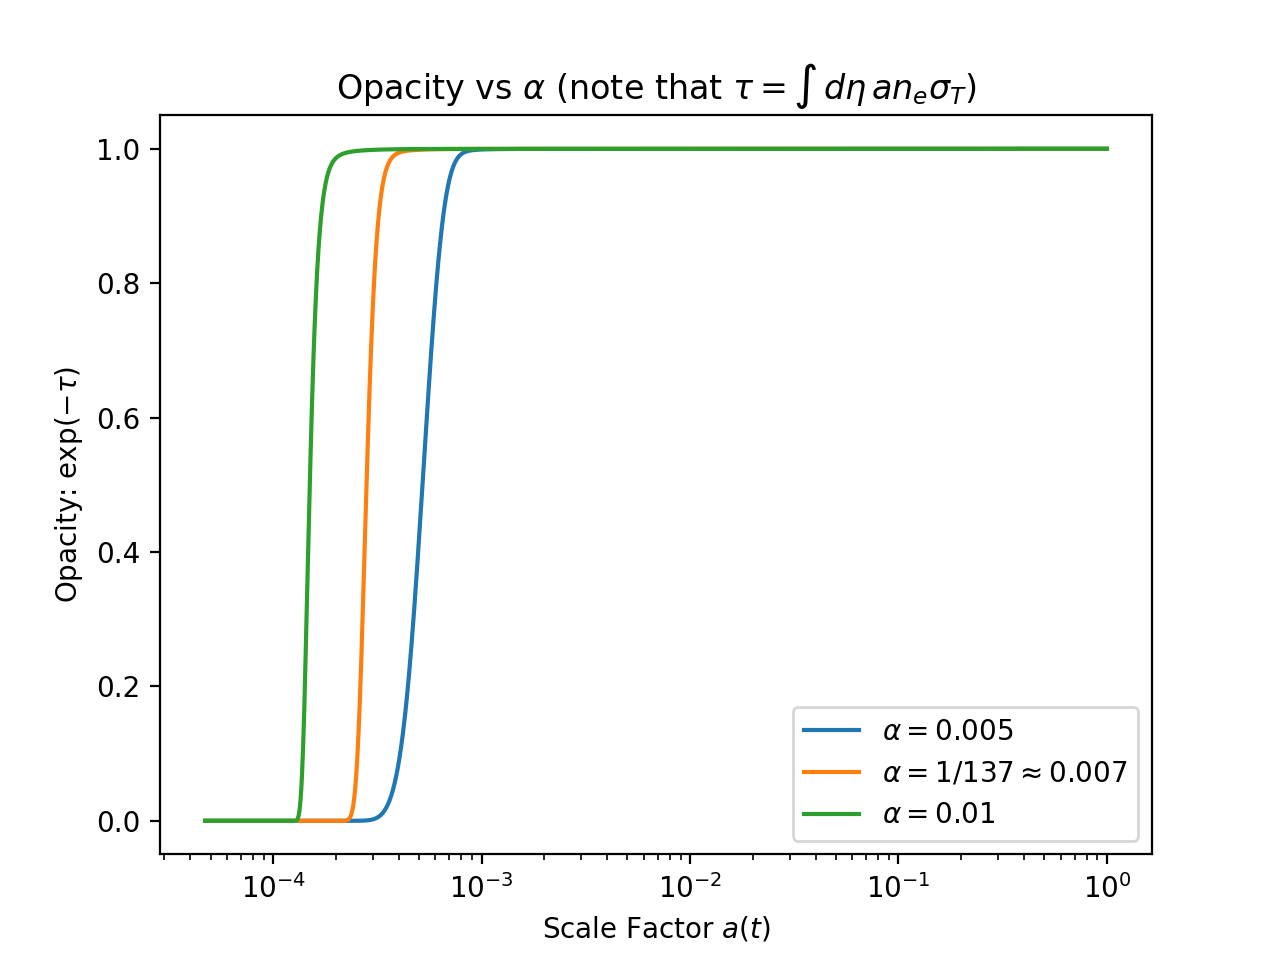

Text(0, 0.5, 'Opacity: $\\exp(-\\tau)$')

In [83]:

def get_data(array):
    z = 1./(1.+array[:,0])
    g = array[:,13]
    tau = array[:,12]
    return [z,g,tau]

zstd, gstd, taustd = get_data(twin_std)

z010, g010, tau010 = get_data(twin_a010)

z005, g005, tau005 = get_data(twin_a005)

z050, g050, tau050 = get_data(twin_a050)

plt.figure()
plt.plot(z005,g005,label=r'$\alpha = 0.005$')
plt.plot(zstd,gstd,label=r'$\alpha = 1/137 \approx 0.007$')
plt.plot(z010,g010,label=r'$\alpha = 0.01$')
plt.plot(z050,g050,label=r'$\alpha = 0.05$')
plt.xscale('log')
plt.legend()
plt.title(r'Visibility Functions vs $\alpha$')
plt.xlabel(r'Scale Factor $a(t)$')
plt.ylabel(r'Visibility Function: $\frac{d}{d\eta}e^{-\tau}$')

plt.figure()
plt.title(r'Opacity vs $\alpha$ (note that $\tau = \int\, d\eta\, a n_e \sigma_T$)')
plt.plot(z005,np.exp(-tau005),label=r'$\alpha = 0.005$')
plt.plot(zstd,np.exp(-taustd),label=r'$\alpha = 1/137 \approx 0.007$')
plt.plot(z010,np.exp(-tau010),label=r'$\alpha = 0.01$')
plt.xscale('log')
#plt.yscale('log')
plt.legend()
plt.xlabel(r'Scale Factor $a(t)$')
plt.ylabel(r'Opacity: $\exp(-\tau)$')

This more or less matches my expectation for what should be happening. The spike in the visibility function (which is just the time derivative of the opacity) signals the end of the recombination epoch. As we increase $\alpha$, we increase the binding energy so it becomes harder to reionise a bound state once it's formed, so recombination ends sooner. The higher peak signals a more abrupt change which is harder to explain. The opacity curve confirms this as well.

## Testing that $m_e$ affects the physics appropriately

In [68]:
twin_std = np.loadtxt('./output/adm_r0.100_me9.1e-31_mp1.7e-27_alpha0.007thermodynamics.dat')
twin_5me = np.loadtxt('./output/adm_r0.100_me5.0e-30_mp1.7e-27_alpha0.007thermodynamics.dat')
twin_p5me = np.loadtxt('./output/adm_r0.100_me5.0e-31_mp1.7e-27_alpha0.007thermodynamics.dat')

<IPython.core.display.Javascript object>


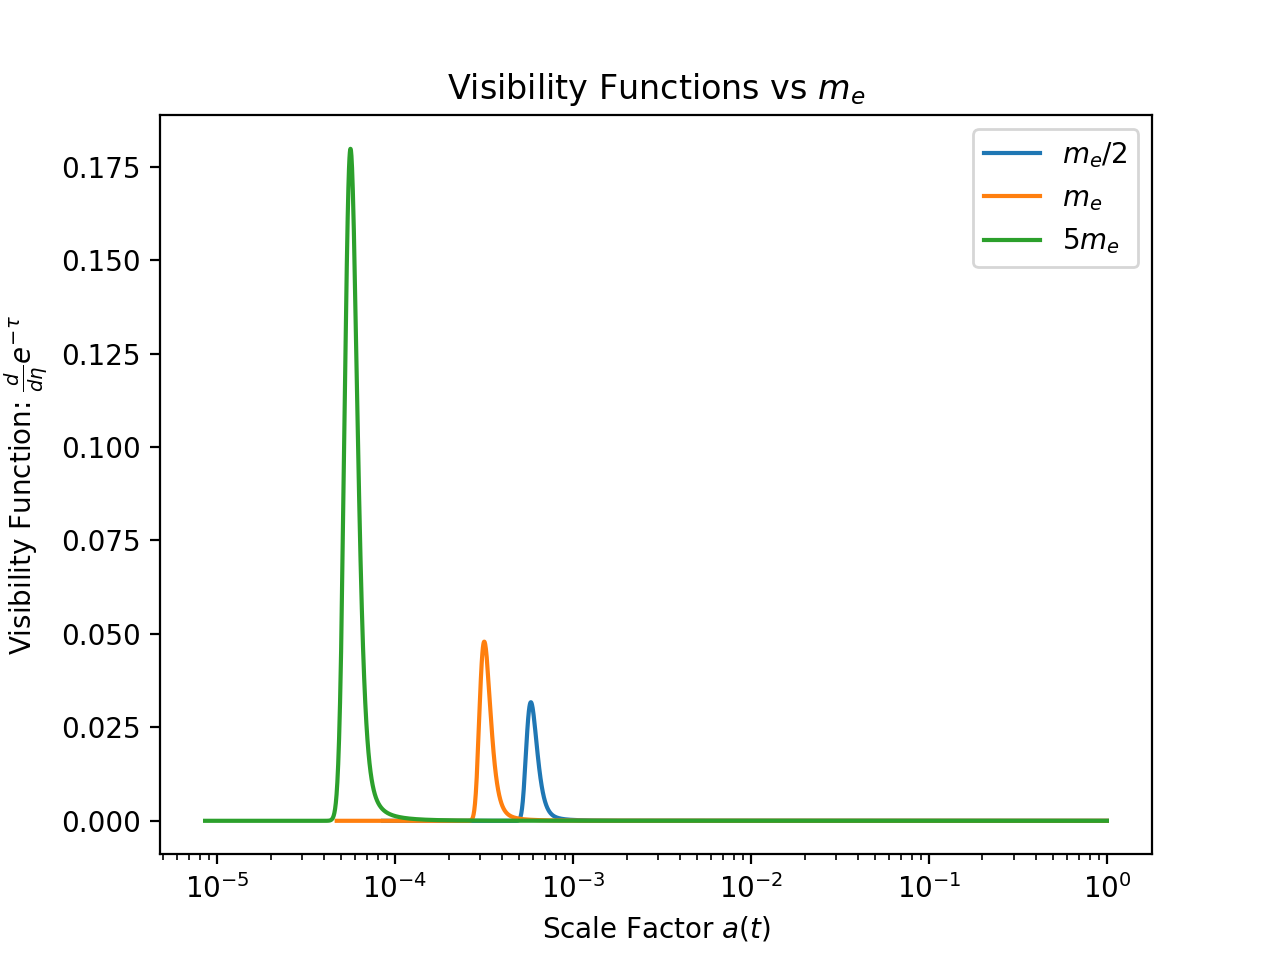

<IPython.core.display.Javascript object>


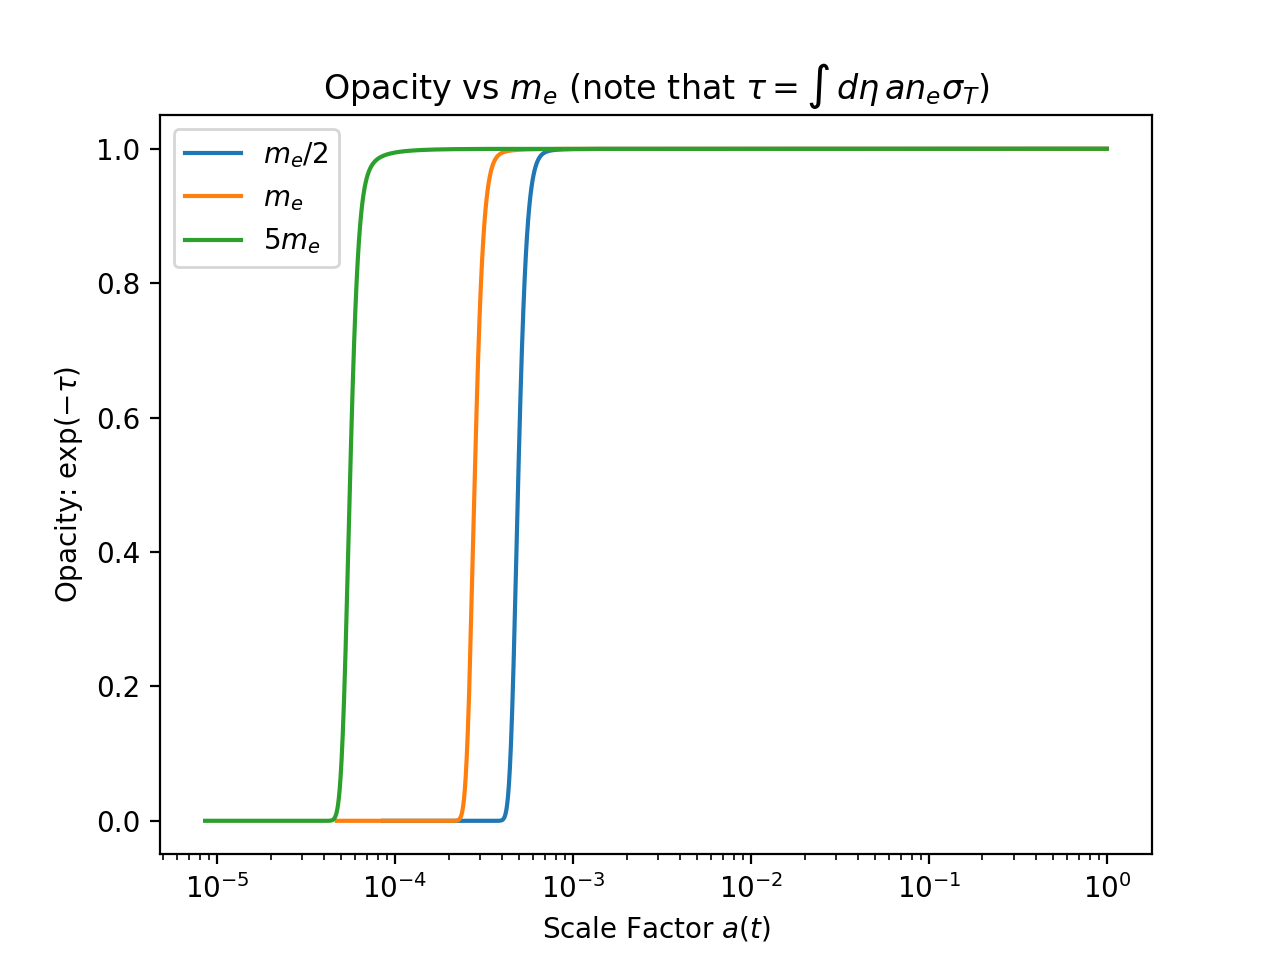

Text(0, 0.5, 'Opacity: $\\exp(-\\tau)$')

In [114]:
zstd, gstd, taustd = get_data(twin_std)

z5me, g5me, tau5me = get_data(twin_5me)

zp5me, gp5me, taup5me = get_data(twin_p5me)

plt.figure()
plt.plot(zp5me,gp5me,label=r'$m_e/2$')
plt.plot(zstd,gstd,label=r'$m_e$')
plt.plot(z5me,g5me,label=r'$5m_e$')
plt.xscale('log')
plt.legend()
plt.title(r'Visibility Functions vs $m_e$')
plt.xlabel(r'Scale Factor $a(t)$')
plt.ylabel(r'Visibility Function: $\frac{d}{d\eta}e^{-\tau}$')


plt.figure()
plt.title(r'Opacity vs $m_e$ (note that $\tau = \int\, d\eta\, a n_e \sigma_T$)')
plt.plot(zp5me,np.exp(-taup5me),label=r'$m_e/2$')
plt.plot(zstd,np.exp(-taustd),label=r'$m_e$')
plt.plot(z5me,np.exp(-tau5me),label=r'$5m_e$')
plt.xscale('log')
plt.legend()
plt.xlabel(r'Scale Factor $a(t)$')
plt.ylabel(r'Opacity: $\exp(-\tau)$')

It's more or less the same idea as before. $m_e$ is proportional to the binding energy so as $m_e$ rises, the binding energy increases so recombination ends sooner (it's harder for photons to reionise bound states). That's what you see in both plots.

## Perturbation test

In [107]:
pert_std = np.loadtxt('./output/adm_r0.100_me9.1e-31_mp1.7e-27_alpha0.007perturbations_k0_s.dat')
pert_a004 = np.loadtxt('./output/adm_r0.100_me9.1e-31_mp1.7e-27_alpha0.004perturbations_k0_s.dat')
pert_a002 = np.loadtxt('./output/adm_r0.100_me9.1e-31_mp1.7e-27_alpha0.002perturbations_k0_s.dat')

<IPython.core.display.Javascript object>


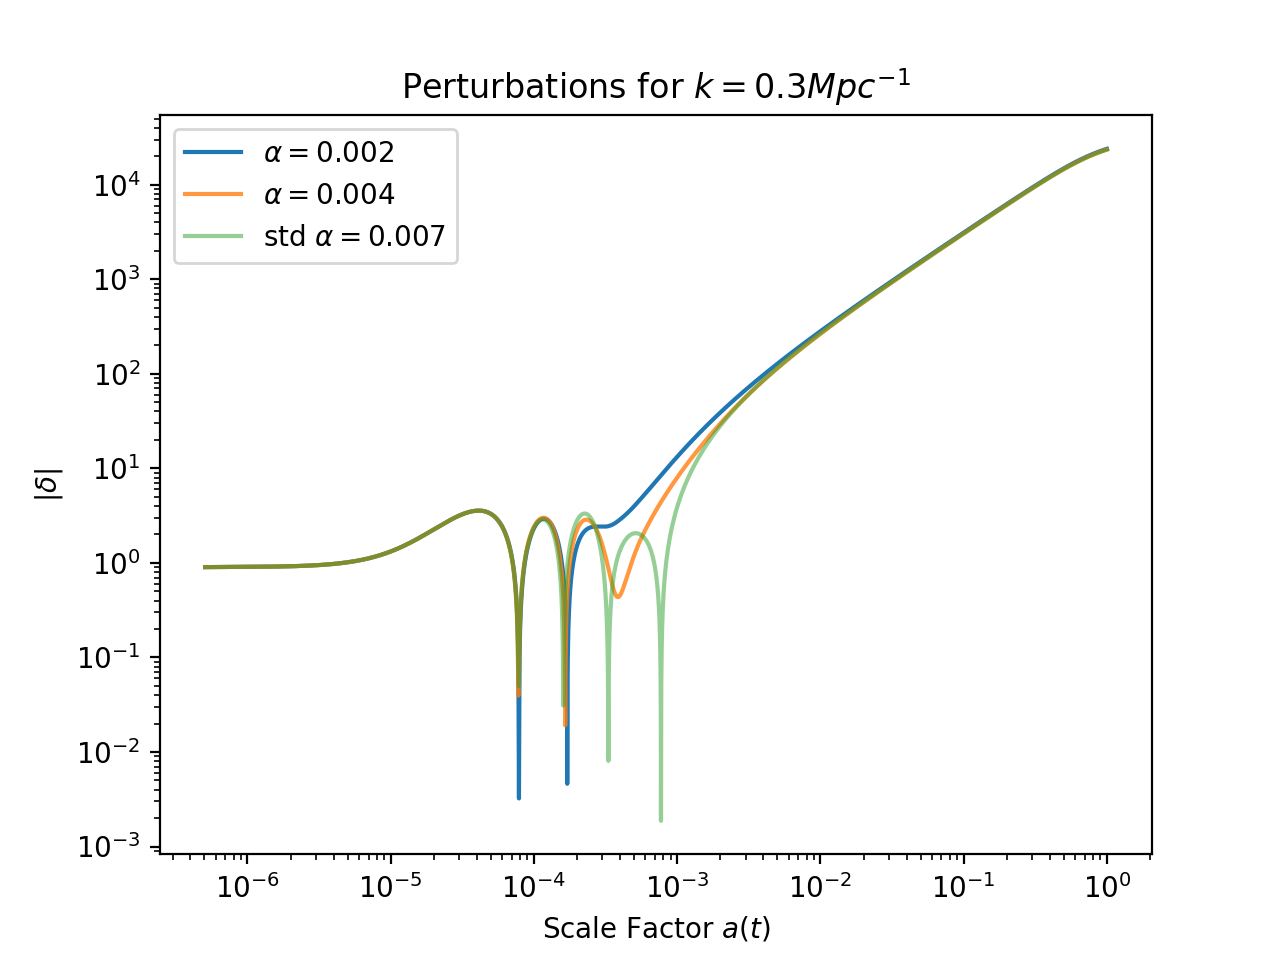

In [115]:
astd = pert_std[:,1]; dtwinstd = pert_std[:,18]
a004 = pert_a004[:,1]; dtwin004 = pert_a004[:,18]
a002 = pert_a002[:,1]; dtwin002 = pert_a002[:,18]

plt.figure()

plt.plot(a002,np.abs(dtwin002),label=r'$\alpha=0.002$')
plt.plot(a004,np.abs(dtwin004),label=r'$\alpha=0.004$',alpha=0.8)
plt.plot(astd,np.abs(dtwinstd),label=r"std $\alpha=0.007$",alpha=0.5)

plt.title(r'Perturbations for $k = 0.3 Mpc^{-1}$')
plt.ylabel(r'$|\delta|$')
plt.xlabel(r'Scale Factor $a(t)$')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.legend()